In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

C:\Users\igor_\anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.17.0', 'qiskit-aqua': '0.9.5', 'qiskit': '0.31.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('Sua key da ibm')

In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
from qiskit import *
from numpy import pi
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[2])
circuit.draw()

░                ┌───┐ ░ ┌─┐    ░         
q_0: ─░─────────────■──┤ H ├─░─┤M├────░───────■─
      ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ─░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
      ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ─░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
      ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/═══════════════════════════╩══╩════════════
                                0  1

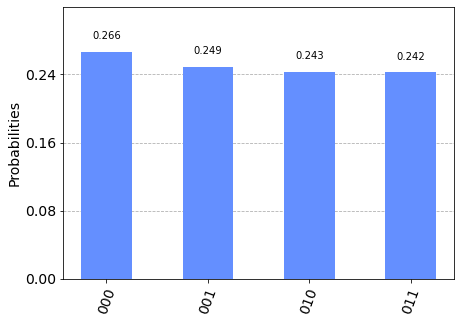

In [7]:
circuit.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts(circuit)
print(counts)
num_c2_zero = sum(counts[c2c1c0] for c2c1c0 in counts if c2c1c0[0] == '0')

{'010': 230, '011': 261, '001': 280, '000': 253}


In [9]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
qcomp = provider.get_backend('ibmq_lima')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(circuit))

In [ ]:
from qiskit import *
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[2])
%matplotlib inline
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

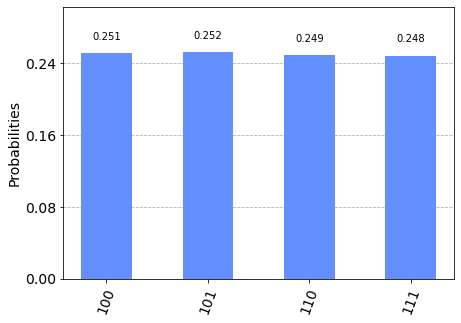

In [ ]:
circuit.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')
result2 = execute(circuit, backend = simulator, shots = 32768).result()
counts2 = result2.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts2)

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=32768).result()
counts = result.get_counts(circuit)
print(counts)
num_c2_one = sum(counts[c2c1c0] for c2c1c0 in counts if c2c1c0[1] == '1')

{'110': 8121, '101': 8212, '100': 8227, '111': 8208}


ibmqfactory.load_account:WARNING:2021-11-05 19:11:29,131: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


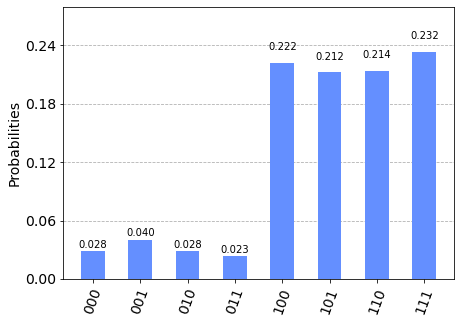

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
Qcomp = provider.get_backend('ibmq_lima')
job = execute(circuit, backend=Qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result2 = job.result()
plot_histogram(result2.get_counts(circuit))

In [ ]:
from qiskit import IBMQ, Aer
provider = IBMQ.load_account()
available_cloud_backends = provider.backends() 
print('\n Cloud backends:')
for i in available_cloud_backends: print(i)

available_local_backends = Aer.backends() 
print('\n Local backends: ')
for i in available_local_backends: print(i)

ibmqfactory.load_account:WARNING:2021-11-05 19:12:30,244: Credentials are already in use. The existing account in the session will be replaced.



 Cloud backends:
ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila

 Local backends: 
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator
